In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import time
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np 
import time
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as MSE
from pyGRNN import GRNN #imports the GRNN regressor module
from pyGRNN import feature_selection as FS #imports the GRNN feature selector module
import math
import numpy as np
from numpy.random import seed
seed(1)
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Layer
from keras import backend as K
import gc
import numpy as np
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from mlens.visualization import corr_X_y, corrmat
from mlens.metrics import make_scorer
from mlens.model_selection import Evaluator
from scipy.stats import uniform, randint
from matplotlib.pyplot import show
%matplotlib inline

In [176]:
df = pd.read_csv(r'C:\diploma\datasets\DataSetMaxwellDevelopment_Dataset.csv', engine='python')
df.head(5)

,id,size,effort,duration,syear,app,har,dba,Ifc,source,...,t08,t09,t10,t11,t12,t13,t14,t15,time,prod
0,1,562,1062,14,1991,InfServ,PC,Relatnl,GUI,Outsrced,...,4,3,3,2,4,3,5,3,7,0.529190
1,2,647,7871,16,1992,TransPro,Mainfrm,Relatnl,TextUI,Inhouse,...,5,4,5,4,4,4,4,5,8,0.082201
2,3,130,845,5,1993,TransPro,Mainfrm,Relatni,TextUI,Inhouse,...,2,4,3,4,4,4,4,4,9,0.153846
3,4,254,2330,8,1990,InfServ,Mainfrm,Relatnl,TextUI,Inhouse,...,3,4,5,4,3,2,3,3,6,0.109013
4,5,1056,21272,16,1986,CustServ,Mainfrm,Relatnl,TextUI,Inhouse,...,5,4,4,5,4,3,2,3,2,0.049643


In [177]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [178]:
missing_values_table(df)

Your selected dataframe has 33 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Ian4,50,79.4
Ian3,31,49.2
Ian2,11,17.5
Ian1,1,1.6


In [179]:
# Find most common values in each column with empty values
mostCommonValueIan1 = df.Ian1.mode()[0]
mostCommonValueIan2 = df.Ian2.mode()[0]
mostCommonValueIan3 = df.Ian3.mode()[0]
mostCommonValueIan4 = df.Ian4.mode()[0]

#Replace empty values to np.nan
df.replace(r'^\s*$', np.nan, regex=True)

#Replace np.nan to most common value in each column
df.Ian1 = df.Ian1.fillna(mostCommonValueIan1)
df.Ian2 = df.Ian2.fillna(mostCommonValueIan2)
df.Ian3 = df.Ian3.fillna(mostCommonValueIan3)
df.Ian4 = df.Ian4.fillna(mostCommonValueIan4)

In [180]:
missing_values_table(df)

Your selected dataframe has 33 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [181]:
label_encoder = preprocessing.LabelEncoder()
df.app = label_encoder.fit_transform(df.app)
df.har = label_encoder.fit_transform(df.har)
df.dba = label_encoder.fit_transform(df.dba)
df.Ifc = label_encoder.fit_transform(df.Ifc)
df.source = label_encoder.fit_transform(df.source)

df.Ian1 = label_encoder.fit_transform(df.Ian1.astype(str))
df.Ian1 = label_encoder.fit_transform(df.Ian1)

df.Ian2 = label_encoder.fit_transform(df.Ian2.astype(str))
df.Ian2 = label_encoder.fit_transform(df.Ian2)

df.Ian3 = label_encoder.fit_transform(df.Ian3.astype(str))
df.Ian3 = label_encoder.fit_transform(df.Ian3)

df.Ian4 = label_encoder.fit_transform(df.Ian4.astype(str))
df.Ian4 = label_encoder.fit_transform(df.Ian4)

df.telonuse = label_encoder.fit_transform(df.telonuse)

In [182]:
#Remove insignificant fields
df = df.drop(columns = ['id'])

In [97]:
df.corr()

,size,effort,duration,syear,app,har,dba,Ifc,source,Ian1,...,t08,t09,t10,t11,t12,t13,t14,t15,time,prod
size,1.000000,0.840122,0.521417,0.015667,-0.046882,0.088998,0.201942,-0.074706,0.109911,-0.112320,...,-0.007513,0.166756,0.202245,0.433397,0.162289,0.117783,-0.104829,0.332170,0.015667,0.081550
effort,0.840122,1.000000,0.657254,-0.203336,0.065630,-0.085321,0.164075,0.103880,-0.056140,-0.067921,...,0.224177,0.226156,0.250616,0.390669,0.129974,0.137631,-0.283490,0.256495,-0.203336,-0.252605
duration,0.521417,0.657254,1.000000,-0.414193,0.092344,-0.065006,0.232882,0.222795,0.071669,0.003092,...,0.378032,-0.007073,-0.032632,0.093806,-0.223321,0.163080,-0.260810,-0.048068,-0.414193,-0.248527
syear,0.015667,-0.203336,-0.414193,1.000000,-0.056356,0.256328,-0.064370,-0.166958,0.076972,0.099126,...,-0.471247,0.174292,0.111757,0.206193,0.118053,-0.187707,0.328109,0.229272,1.000000,0.250446
app,-0.046882,0.065630,0.092344,-0.056356,1.000000,-0.227382,0.186698,-0.001578,0.212160,0.120092,...,-0.121141,0.005162,0.160007,-0.325428,-0.064685,0.002268,-0.136247,0.121967,-0.056356,-0.132536
har,0.088998,-0.085321,-0.065006,0.256328,-0.227382,1.000000,-0.350378,-0.378500,0.511807,-0.394292,...,-0.177621,0.034859,-0.063082,0.082269,0.015385,-0.201076,0.465351,-0.097680,0.256328,0.356332
dba,0.201942,0.164075,0.232882,-0.064370,0.186698,-0.350378,1.000000,-0.072236,0.154524,0.266065,...,-0.029708,-0.009693,0.082364,-0.169934,0.048195,0.097082,-0.229157,0.369250,-0.064370,0.052149
Ifc,-0.074706,0.103880,0.222795,-0.166958,-0.001578,-0.378500,-0.072236,1.000000,-0.551383,0.193854,...,0.065417,-0.139094,-0.132005,0.058691,-0.334756,-0.105034,-0.264572,-0.346381,-0.166958,-0.597569
source,0.109911,-0.056140,0.071669,0.076972,0.212160,0.511807,0.154524,-0.551383,1.000000,-0.208538,...,-0.062017,0.034847,-0.022026,-0.256668,-0.028614,-0.123999,0.153280,0.185240,0.076972,0.377700
Ian1,-0.112320,-0.067921,0.003092,0.099126,0.120092,-0.394292,0.266065,0.193854,-0.208538,1.000000,...,-0.112729,-0.138615,-0.169604,-0.312546,-0.169218,0.107808,-0.158869,-0.017297,0.099126,0.056857


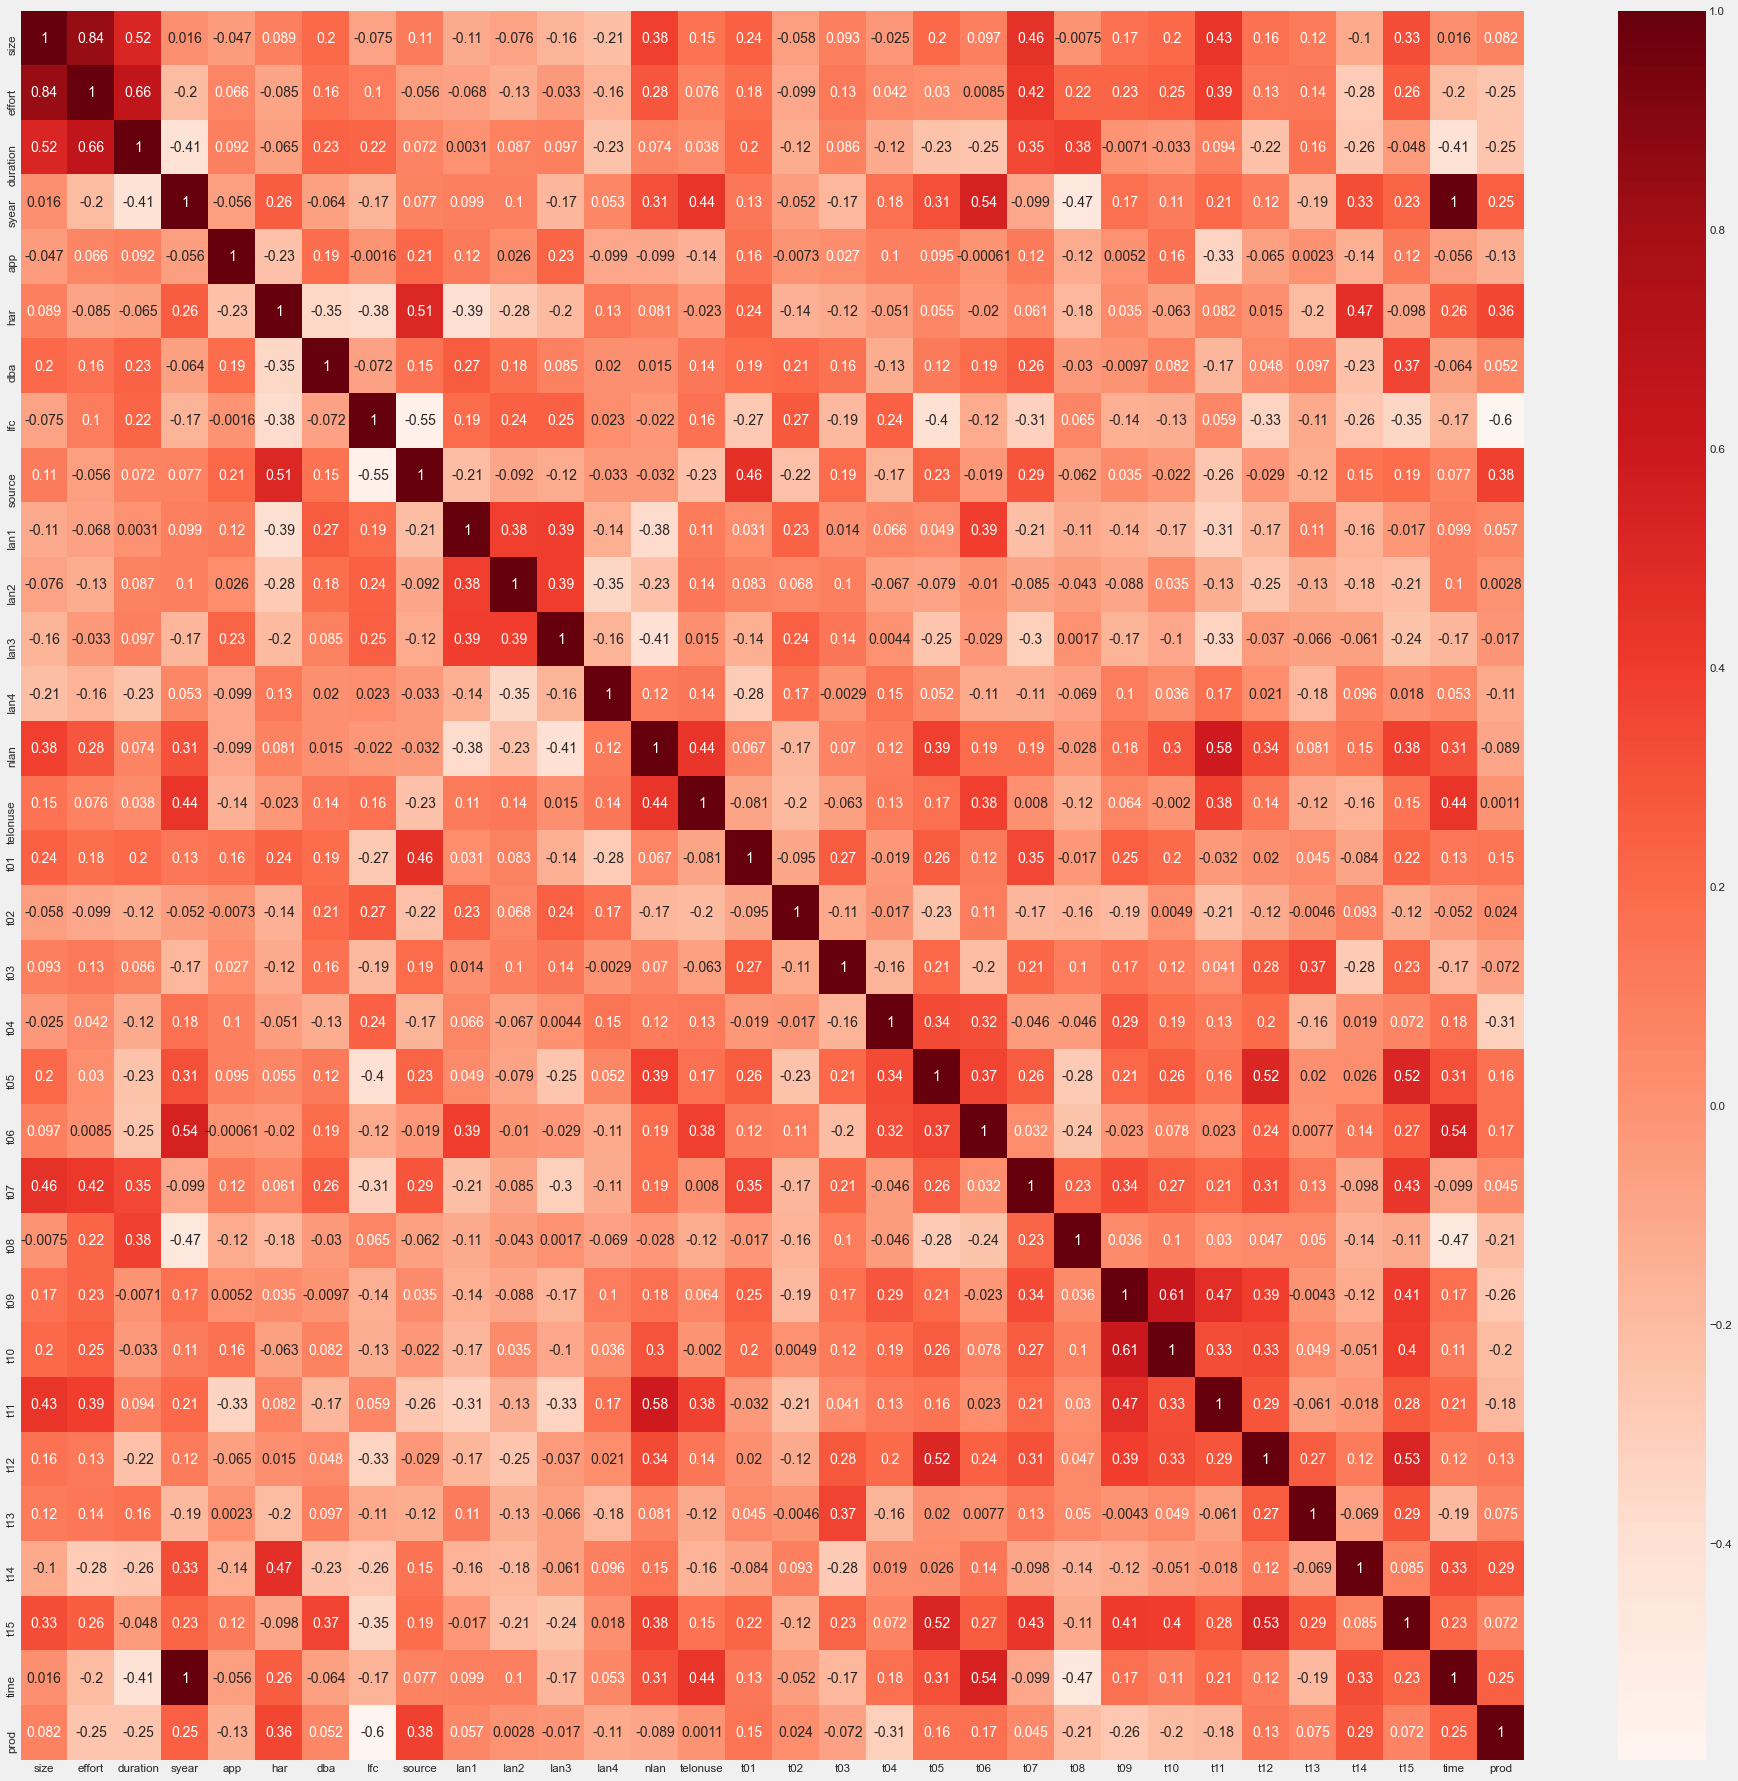

In [98]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [183]:
#Remove columns with low correlation values
df = df.drop(columns = ['app', 'har', 'Ifc', 'source', 'Ian1', 'Ian2','Ian3', 'Ian4', 'telonuse', 't01', 't02', 't03', 't04', 't05', 't06', 't12', 't13', 't14', 'time', 'dba', 't09'])

In [100]:
# SVR

In [101]:
def launch_model(name,model, X_train, y_train, X_test, y_test):
    start = time.time()
    model.fit(X_train[predictors], y_train)
    y_pred = model.predict(X_test[predictors])
    ypred_train = model.predict(X_train[predictors])
    print ('RMSE', math.sqrt(mean_squared_error(y_test, y_pred)))
    print ('MAE', mean_absolute_error(y_test, y_pred))
    r_2 = round(r2_score(y_test, y_pred), 2)
    print ('R^2', r_2)
    print('Execution time: {0:.2f} sec.'.format(time.time() - start))
    return name + '($R^2={:.3f}$)'.format(r_2), np.array(y_test), y_pred

In [102]:
def plot(results):

    fig, plts = plt.subplots(nrows=len(results), figsize=(8, 8))
    fig.canvas.set_window_title('Predicting Boston')

    for subplot, (title, y, y_pred) in zip(plts, results):

        subplot.set_xticklabels(())
        subplot.set_yticklabels(())

        subplot.set_ylabel('Precio casa')

        subplot.set_title(title)

        subplot.plot(y, 'b', label='actual')
        subplot.plot(y_pred, 'r', label='predicted')
        
        subplot.fill_between(
            np.arange(0, len(y), 1),
            y,
            y_pred,
            color='r',
            alpha=0.2
        )
        subplot.axvline(len(y) // 2, linestyle='--', color='0', alpha=0.2)
        subplot.legend()
    fig.tight_layout()
    plt.show()
    plt.savefig('plot.png')
    plt.close()

In [103]:
target = df['effort']
predictors = ['size', 'duration','nlan', 't07', 't08','t10', 't11', 't15', 'prod']
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

In [104]:
svr_rbf = SVR(kernel='rbf', gamma=0.1)
svr_lineal = SVR(kernel='linear')
lr = LinearRegression()

In [105]:
results = []
print ('-----------')
print ('SVR - RBF')
print ('-----------')
results.append(launch_model('SVR - RBF', svr_rbf, X_train, y_train, X_test, y_test))
print ('-----------')
print ('SVR - lineal')
print ('-----------')
results.append(launch_model('SVR - lineal', svr_lineal, X_train, y_train, X_test, y_test))
print ('-----------')
print ('Regresion lineal')
print ('-----------')
results.append(launch_model('Regresion lineal', lr, X_train, y_train, X_test, y_test))

-----------
SVR - RBF
-----------
RMSE 8031.558219039978
MAE 5262.625894527126
R^2 -0.24
Execution time: 0.02 sec.
-----------
SVR - lineal
-----------
RMSE 5604.852380856293
MAE 3875.113017753747
R^2 0.4
Execution time: 0.02 sec.
-----------
Regresion lineal
-----------
RMSE 3338.056066465663
MAE 2333.0253926328255
R^2 0.79
Execution time: 0.02 sec.


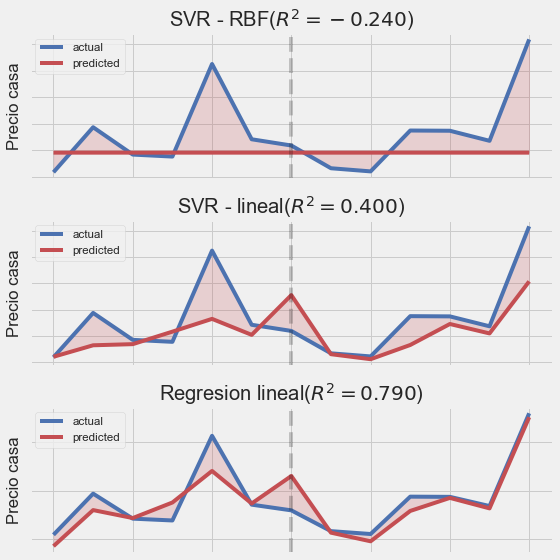

In [106]:
plot(results)

In [107]:
# Random Forests

In [108]:
labels = np.array(df['effort'])
df = df.drop('effort', axis = 1)
feature_list = list(df.columns)
features = np.array(df)

In [109]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [170]:
rf = RandomForestRegressor(n_estimators = 100) #, random_state = 42
rf.fit(train_features, train_labels);

In [171]:
predictions = rf.predict(test_features)

In [172]:
mae = mean_absolute_error(test_labels, predictions)
print('Mean Absolute Error:', mae)
mse_sqrt = math.sqrt(mean_squared_error(test_labels, predictions))
print('Mean Squared Error Root:', mse_sqrt)
r2 = round(r2_score(test_labels, predictions), 2)
print('R^2:', r2)

Mean Absolute Error: 1745.4097222222222
Mean Squared Error Root: 2135.0184257379933
R^2: 0.71


In [87]:
results.append(('Random Forest' + '($R^2={:.3f}$)'.format(r2), np.array(y_test), predictions))

In [173]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
#In future implementations of the model, we can remove those variables 
# that have no importance and the performance will not suffer.

Variable: size                 Importance: 0.65
Variable: duration             Importance: 0.2
Variable: prod                 Importance: 0.06
Variable: syear                Importance: 0.03
Variable: t15                  Importance: 0.02
Variable: nlan                 Importance: 0.01
Variable: t07                  Importance: 0.01
Variable: t08                  Importance: 0.01
Variable: t10                  Importance: 0.01
Variable: t11                  Importance: 0.01


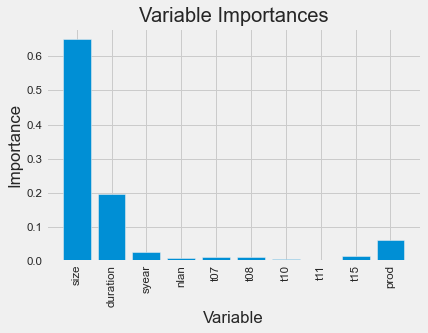

In [174]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
#GRNN

In [184]:
y = df['effort'].values.ravel()
X = df.drop(["effort"], axis = 1).values
X_train, X_test, y_train, y_test = train_test_split(preprocessing.minmax_scale(X), y.reshape((-1, 1)), test_size=0.25, random_state = 42)

In [185]:
featnames=list(df.drop(["effort"], axis = 1).columns)

In [186]:
IsotropicSelector = FS.Isotropic_selector()

Searching relatidness for feature 0
Best subset is: ['duration', 'syear', 't11', 't15', 'prod']
Searching relatidness for feature 1
Best subset is: ['syear', 't07']
Searching relatidness for feature 2
Best subset is: ['size', 'duration', 'nlan', 't08', 't15', 'prod']
Searching relatidness for feature 3
Best subset is: ['t11']
Searching relatidness for feature 4
Best subset is: ['t08', 't10', 't11', 't15']
Searching relatidness for feature 5
Best subset is: ['syear', 'prod']
Searching relatidness for feature 6
Best subset is: ['size', 'duration', 'prod']
Searching relatidness for feature 7
Best subset is: ['nlan', 't15']
Searching relatidness for feature 8
Best subset is: ['t10', 't11']
Searching relatidness for feature 9
Best subset is: ['size', 't07', 't10']
Time to complete the search [s]: 0.8316044807434082


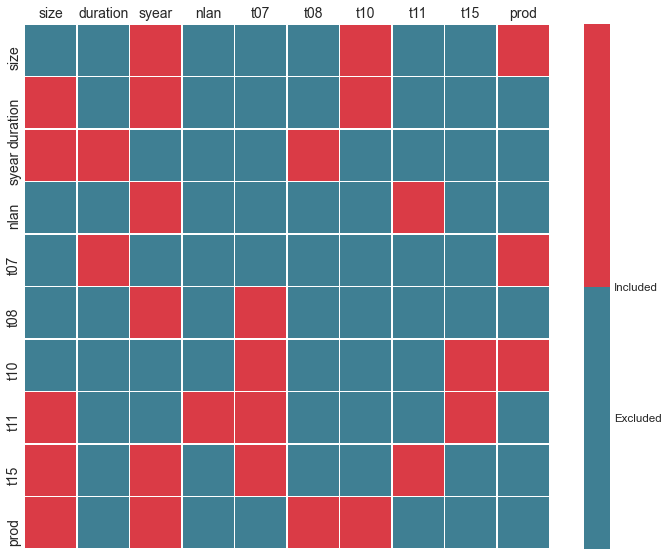

In [187]:
start = time.time()
IsotropicSelector.relatidness(X_train, feature_names=featnames, strategy = 'ffs')
IsotropicSelector.plot_(featnames)
print('Time to complete the search [s]: ' + str(time.time() - start))

In [188]:
print('Selecting the best subset of features using a forward fs strategy:')
start = time.time()
IsotropicSelector.ffs(X_train, y_train, feature_names=featnames)
print('Time to complete the search [s]: ' + str(time.time() - start))

Selecting the best subset of features using a forward fs strategy:
Best subset is: ['size', 't07', 't10']
Time to complete the search [s]: 0.029923200607299805


In [189]:
print('Selecting the best subset of features using a backward fs strategy:')
start = time.time()
IsotropicSelector.bfs(X_train, y_train, feature_names=featnames)
print('Time to complete the search [s]: ' + str(time.time() - start))

Selecting the best subset of features using a backward fs strategy:
Best subset is: ['size', 't07', 't10']
Time to complete the search [s]: 0.003961324691772461


In [190]:
print('Selecting the best subset of features using an exhaustive search:')
start = time.time()
IsotropicSelector.es(X_train, y_train, feature_names=featnames)
print('Time to complete the search [s]: ' + str(time.time() - start))

Selecting the best subset of features using an exhaustive search:
Exploring the 1023 possible combination of features...
The best subset of features is ['size', 't07', 't10']
Time to complete the search [s]: 2.2433133125305176


In [191]:
print('Performing a complete feature selection from scratch:')
start = time.time()
IsotropicSelector.feat_selection(X_train, y_train, feature_names=featnames, strategy = 'ffs')
print('Time to complete the feature selection [s]: ' + str(time.time() - start))

Performing a complete feature selection from scratch:
Searching relevant features...
Best subset is: ['size', 't07', 't10']
Searching the best subset to predict feature 0
Best subset is: ['duration', 'syear', 't11', 't15', 'prod']
[0, 3, 4, 5, 6]
Searching the best subset to predict feature 4
Best subset is: ['t08', 't10', 't11', 't15']
[0, 1, 2, 3, 4, 9]
Searching the best subset to predict feature 6
Best subset is: ['size', 'duration', 'prod']
[2, 3, 4, 5, 6, 7, 8]
Research completed!
The relevant features are: ['size', 't07', 't10']
The redundant features are: ['duration', 'syear', 't11', 't15', 'prod', 't08']
The irrelevant features are: ['nlan']
Time to complete the feature selection [s]: 0.3097412586212158


In [192]:
best_set = IsotropicSelector.best_inSpaceIndex
X_train_BestSet = X_train[:,best_set]
X_test_BestSet = X_test[:,best_set]

In [193]:
# Instantiate the estimator
IGRNN = GRNN()
# Define the parameters for a GridSearch CV and fit the model
params_IGRNN = {'kernel':["RBF"],
                'sigma' : list(np.arange(0.1, 4, 0.01)),
                'calibration' : ['None']
                 }
grid_IGRNN = GridSearchCV(estimator=IGRNN,
                          param_grid=params_IGRNN,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1,
                          n_jobs = -1
                          )
grid_IGRNN.fit(X_train_BestSet, y_train.ravel())
# Use the best model to perform prediction, and compute mse
best_model = grid_IGRNN.best_estimator_
y_pred = best_model.predict(X_test_BestSet)
mse_IGRNN = MSE(y_test, y_pred)
print('MSE with IGRNN (after feature selection): ' + str(mse_IGRNN))

Fitting 5 folds for each of 390 candidates, totalling 1950 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    6.9s


MSE with IGRNN (after feature selection): 17303497.21420012


[Parallel(n_jobs=-1)]: Done 1950 out of 1950 | elapsed:    8.2s finished


In [194]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)
mse_sqrt = math.sqrt(mean_squared_error(y_test, y_pred))
print('Mean Squared Error Root:', mse_sqrt)
r2 = round(r2_score(y_test, y_pred), 2)
print('R^2:', r2)

Mean Absolute Error: 3773.1899461413777
Mean Squared Error Root: 4159.747253644158
R^2: -0.11


In [196]:
df.effort.mode()[0]

583

In [197]:
#Usual NN

In [199]:
df.columns.values

array(['size', 'effort', 'duration', 'syear', 'nlan', 't07', 't08', 't10',
       't11', 't15', 'prod'], dtype=object)

In [231]:
y1 = np.array(df.effort)

x1 = np.column_stack((df['size'], df.duration, df.syear, df.nlan, df.t07, df.t08, df.t10, df.t11, df.t15, df['prod']))
x1 = sm.add_constant(x1, prepend=True)

X_train, X_val, y_train, y_val = train_test_split(x1, y1)

In [232]:
# The training and validation data is then scaled using MinMaxScaler:
y_train=np.reshape(y_train, (-1,1))
y_val=np.reshape(y_val, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)
print(scaler_x.fit(X_val))
xval_scale=scaler_x.transform(X_val)
print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_val))
yval_scale=scaler_y.transform(y_val)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [234]:
model = Sequential()
model.add(Dense(11, input_dim=11, kernel_initializer='normal', activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              12000     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 1001      
Total params: 13,133
Trainable params: 13,133
Non-trainable params: 0
_________________________________________________________________


In [235]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=50, batch_size=150, verbose=1, validation_split=0.2)
predictions = model.predict(xval_scale)

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 0.0402 - mse: 0.0402 - mae: 0.1125 - val_loss: 0.0053 - val_mse: 0.0053 - val_mae: 0.0465
Epoch 2/50
1/1 [==============================] - 0s 80ms/step - loss: 0.0336 - mse: 0.0336 - mae: 0.0914 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0413
Epoch 3/50
1/1 [==============================] - 0s 60ms/step - loss: 0.0286 - mse: 0.0286 - mae: 0.0786 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0512
Epoch 4/50
1/1 [==============================] - 0s 50ms/step - loss: 0.0254 - mse: 0.0254 - mae: 0.0762 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0643
Epoch 5/50
1/1 [==============================] - 0s 50ms/step - loss: 0.0238 - mse: 0.0238 - mae: 0.0821 - val_loss: 0.0067 - val_mse: 0.0067 - val_mae: 0.0746
Epoch 6/50
1/1 [==============================] - 0s 64ms/step - loss: 0.0235 - mse: 0.0235 - mae: 0.0897 - val_loss: 0.0086 - val_mse: 0.0086 - val_mae: 0.0811
Epoch 7/50
1/1 [====================

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


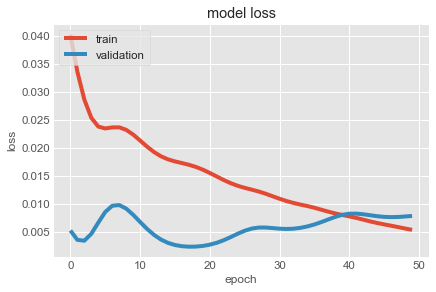

In [236]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [237]:
predictions = scaler_y.inverse_transform(predictions)

In [238]:
mae = mean_absolute_error(y_val, predictions)
print('Mean Absolute Error:', mae)
mse_sqrt = math.sqrt(mean_squared_error(y_val, predictions))
print('Mean Squared Error Root:', mse_sqrt)
r2 = round(r2_score(y_val, predictions), 2)
print('R^2:', r2)

Mean Absolute Error: 4770.129675865173
Mean Squared Error Root: 7759.593569370518
R^2: 0.58


In [214]:
np.mean(y_val)

7757.125

In [216]:
np.mean(predictions)

3850.264

In [ ]:
# RBFN

In [218]:
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [258]:
model = Sequential()
#model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(11, input_dim=11, kernel_initializer='normal', activation='relu'))
model.add(RBFLayer(1000, 0.5))
model.add(Dense(1, activation='sigmoid', name='foo'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 11)                132       
_________________________________________________________________
rbf_layer_3 (RBFLayer)       (None, 1000)              11000     
_________________________________________________________________
foo (Dense)                  (None, 1)                 1001      
Total params: 12,133
Trainable params: 12,133
Non-trainable params: 0
_________________________________________________________________


In [259]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse','mae'])

In [260]:
history=model.fit(xtrain_scale, ytrain_scale, epochs=30, batch_size=256, verbose=1, validation_split=0.2)

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 0.0386 - mse: 0.0386 - mae: 0.1554 - val_loss: 0.0071 - val_mse: 0.0071 - val_mae: 0.0571
Epoch 2/30
1/1 [==============================] - 0s 61ms/step - loss: 0.0380 - mse: 0.0380 - mae: 0.1030 - val_loss: 0.0068 - val_mse: 0.0068 - val_mae: 0.0553
Epoch 3/30
1/1 [==============================] - 0s 123ms/step - loss: 0.0373 - mse: 0.0373 - mae: 0.1011 - val_loss: 0.0063 - val_mse: 0.0063 - val_mae: 0.0523
Epoch 4/30
1/1 [==============================] - 0s 230ms/step - loss: 0.0363 - mse: 0.0363 - mae: 0.0983 - val_loss: 0.0054 - val_mse: 0.0054 - val_mae: 0.0474
Epoch 5/30
1/1 [==============================] - 0s 227ms/step - loss: 0.0346 - mse: 0.0346 - mae: 0.0933 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0423
Epoch 6/30
1/1 [==============================] - 0s 195ms/step - loss: 0.0313 - mse: 0.0313 - mae: 0.0850 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0604
Epoch 7/30
1/1 [================

In [261]:
predictions = model.predict(xval_scale)

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


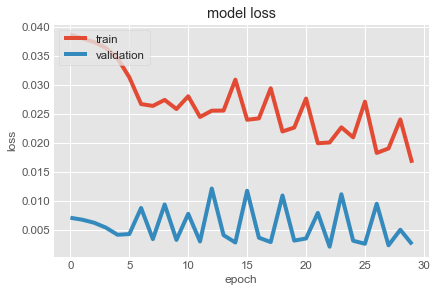

In [262]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [263]:
predictions = scaler_y.inverse_transform(predictions)

In [264]:
mae = mean_absolute_error(y_val, predictions)
print('Mean Absolute Error:', mae)
mse_sqrt = math.sqrt(mean_squared_error(y_val, predictions))
print('Mean Squared Error Root:', mse_sqrt)
r2 = round(r2_score(y_val, predictions), 2)
print('R^2:', r2)
print(r2)

Mean Absolute Error: 6436.700149536133
Mean Squared Error Root: 10776.595054851989
R^2: 0.2
0.2


In [256]:
np.mean(y_val)

10713.5

In [257]:
np.mean(predictions)

6055.753